### Explore preprocessing and cleaning approaches for ECG data in BIOSTAT

In [1]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

#### Choose the subject here

In [2]:
sub = '114'

In [3]:
# Load the raw data from csv file
data = pd.read_csv(f'F:\\BIOSTAT\\1_raw_data_matlab\\sub-{sub}\\ECG.csv')

#check if time column exists and has more than 0 entries
if 'time' in data.columns:
    if len(data['time']) > 0:
        time = data['time'].to_numpy()
    else:
        raise ValueError("time column is empty.")
else:
    raise ValueError("time column does not exist.")
    
#check if ch1 (microvolts) column exists and has more than 0 entries
if 'ch1 (microvolts)' in data.columns:
    if len(data['ch1 (microvolts)']) > 0:
        ecg = data['ch1 (microvolts)'].to_numpy()
    else:
        raise ValueError("ch1 (microvolts) column is empty.")
else:
    raise ValueError("ch1 (microvolts) column does not exist.")
    
# Print the first 10 entries of time and ecg arrays
print("Time:", time[:10])
print("ECG:", ecg[:10])

Time: [18824.14623062 18824.15391677 18824.16160293 18824.16928908
 18824.17697524 18824.18466139 18824.19234754 18824.2000337
 18824.20771985 18824.21540601]
ECG: [143 134 168 184 134  31 -29  -2  27  -9]


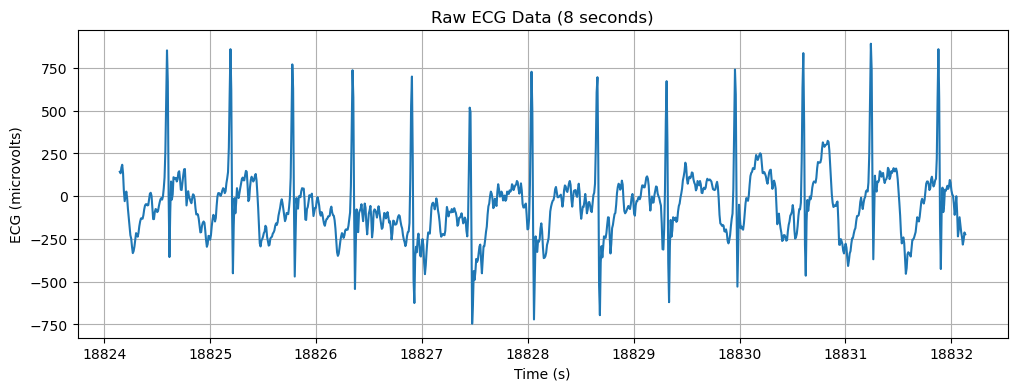

In [4]:
# Plot 8 seconds of raw ECG data
plt.figure(figsize=(12, 4))
plt.plot(time[:130*8], ecg[:130*8])  # Assuming 130 Hz
plt.title('Raw ECG Data (8 seconds)')
plt.xlabel('Time (s)')
plt.ylabel('ECG (microvolts)')
plt.grid()
plt.show()

In [5]:
# Use default neurokit function to process ECG data
ecg_signals, ecg_info = nk.ecg_process(ecg, sampling_rate=130)

# Print the keys of the returned dictionaries
print("ECG Signals Keys:", ecg_signals.keys())

ECG Signals Keys: Index(['ECG_Raw', 'ECG_Clean', 'ECG_Rate', 'ECG_Quality', 'ECG_R_Peaks',
       'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks',
       'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks',
       'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
       'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
       'ECG_Phase_Completion_Ventricular'],
      dtype='object')


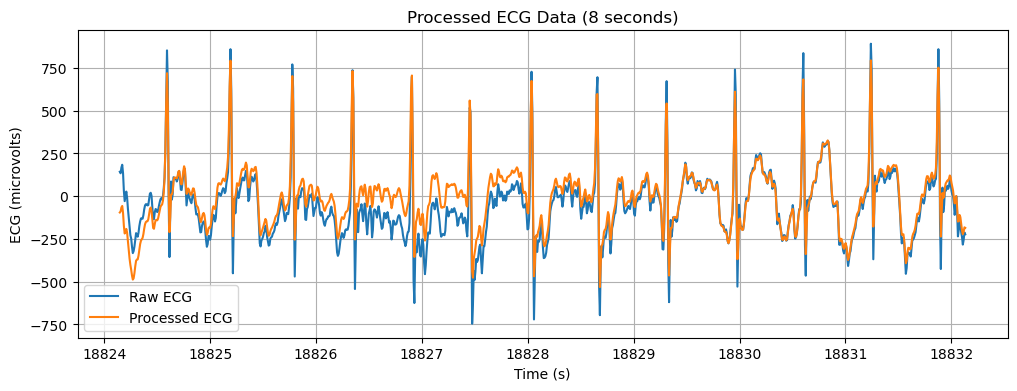

In [6]:
# Plot the processed ECG data on top of the raw data
plt.figure(figsize=(12, 4))
plt.plot(time[:130*8], ecg[:130*8], label='Raw ECG')  # Assuming 130 Hz
plt.plot(time[:130*8], ecg_signals['ECG_Clean'][:130*8], label='Processed ECG')  # Assuming 130 Hz
plt.title('Processed ECG Data (8 seconds)')
plt.xlabel('Time (s)')
plt.ylabel('ECG (microvolts)')
plt.grid()
plt.legend()
plt.show()

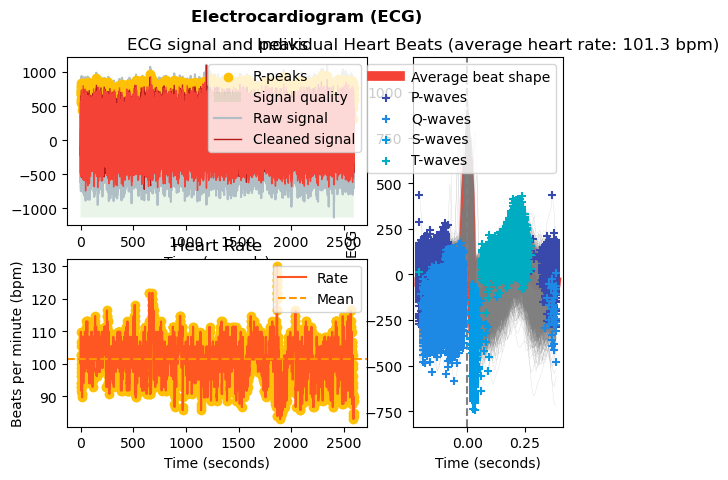

In [7]:
# Show NeuroKit’s built-in ECG diagnostics plot
nk_fig = nk.ecg.ecg_plot(ecg_signals, info=ecg_info)
